<a href="https://colab.research.google.com/github/ElizaZu/neto-aml/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, caption, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        plt.suptitle(caption)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# 1. Monthly sales of company X

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


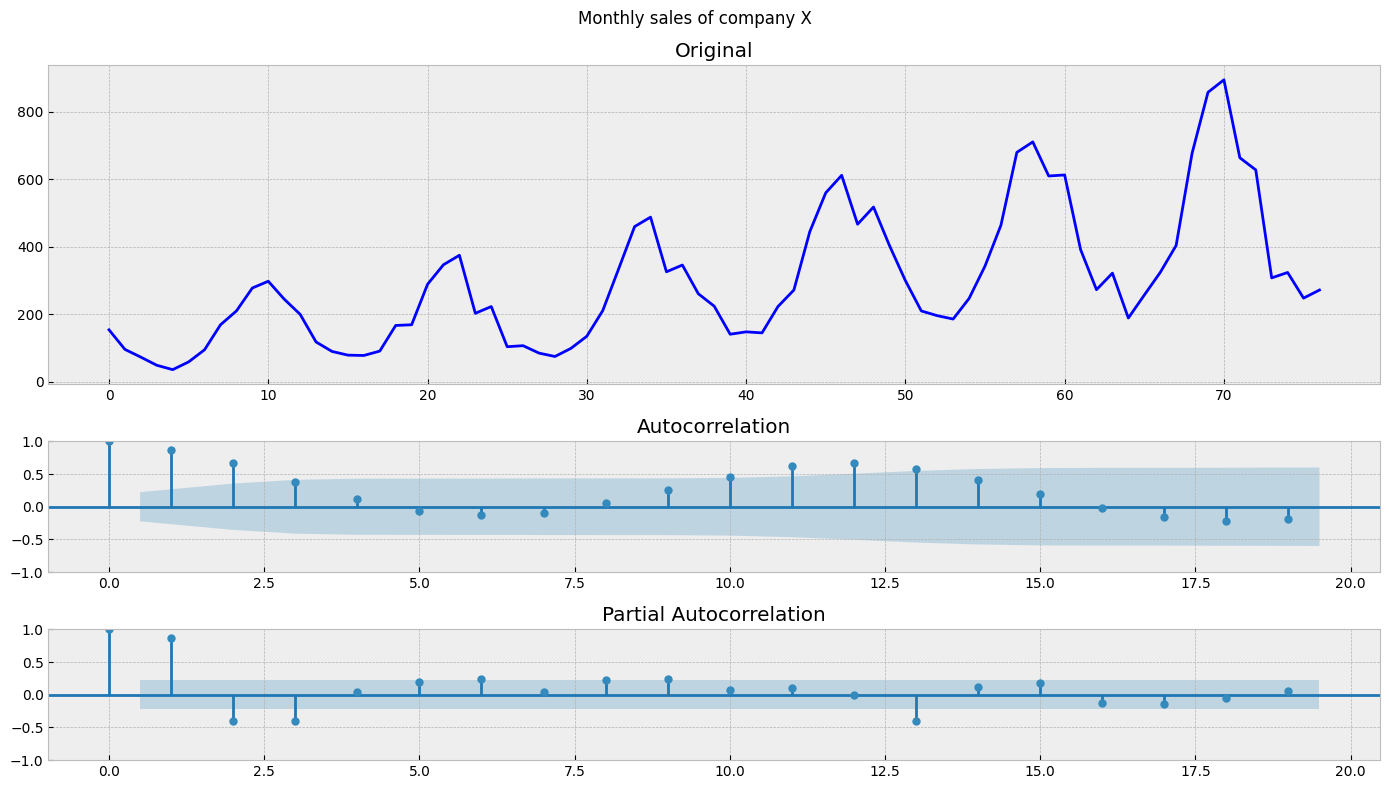

In [ ]:
sname = "Monthly sales of company X";
tsplot(all_series[sname], sname);
test_stationarity(all_series[sname])

По графику видно наличие тренда и можно предположить сезонность.
Коррелограмма и тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                 -4.065956
p-value                         0.001102
#Lags Used                     11.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


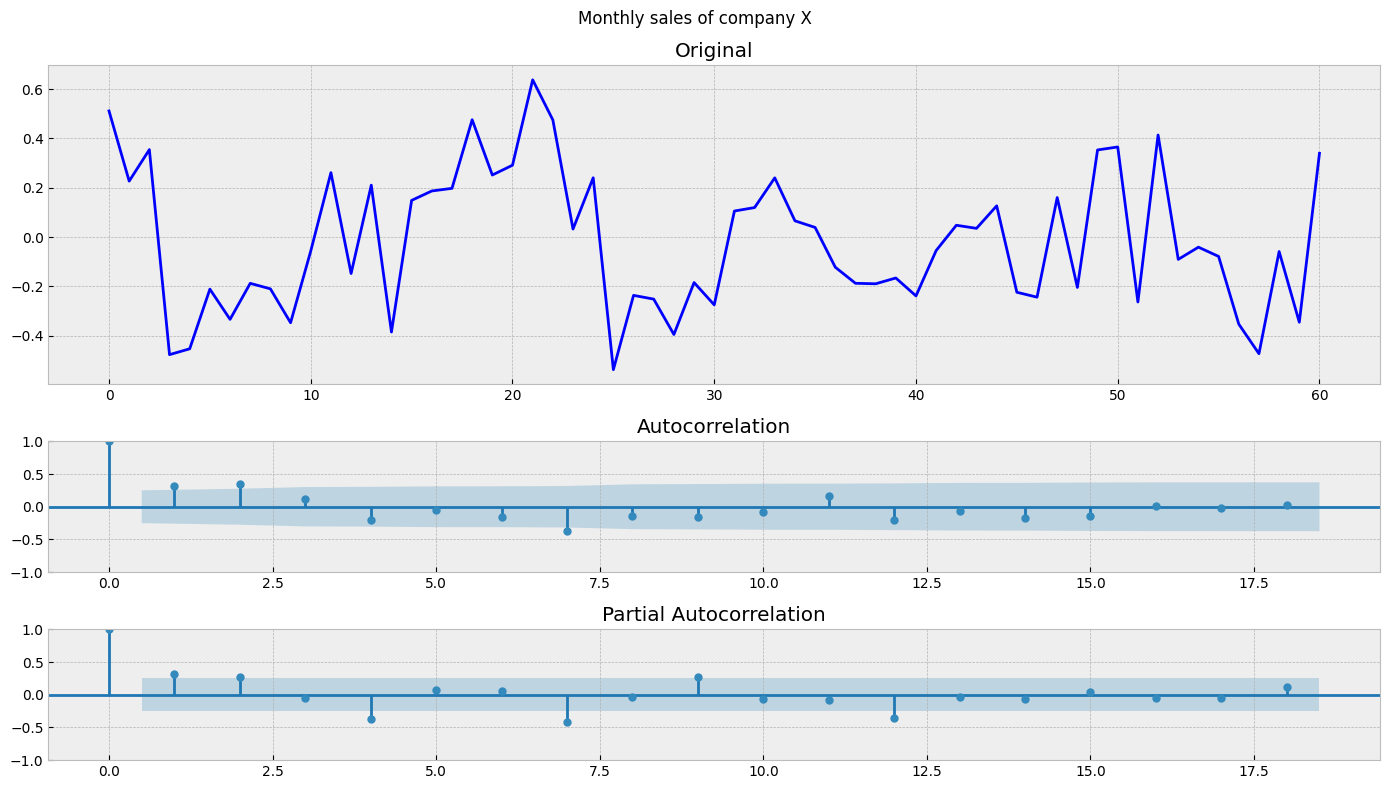

In [ ]:
#Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(all_series[sname], 0)

#Уберем тренд дифференцированием
series = series[4:] - series[:-4]

#Уберем сезонность -
series = series[12:] - series[:-12]

#Коррелограмма
tsplot(series, sname);

#Тест Дики-Фуллера
test_stationarity(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

# 2. Monthly Boston armed robberies

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


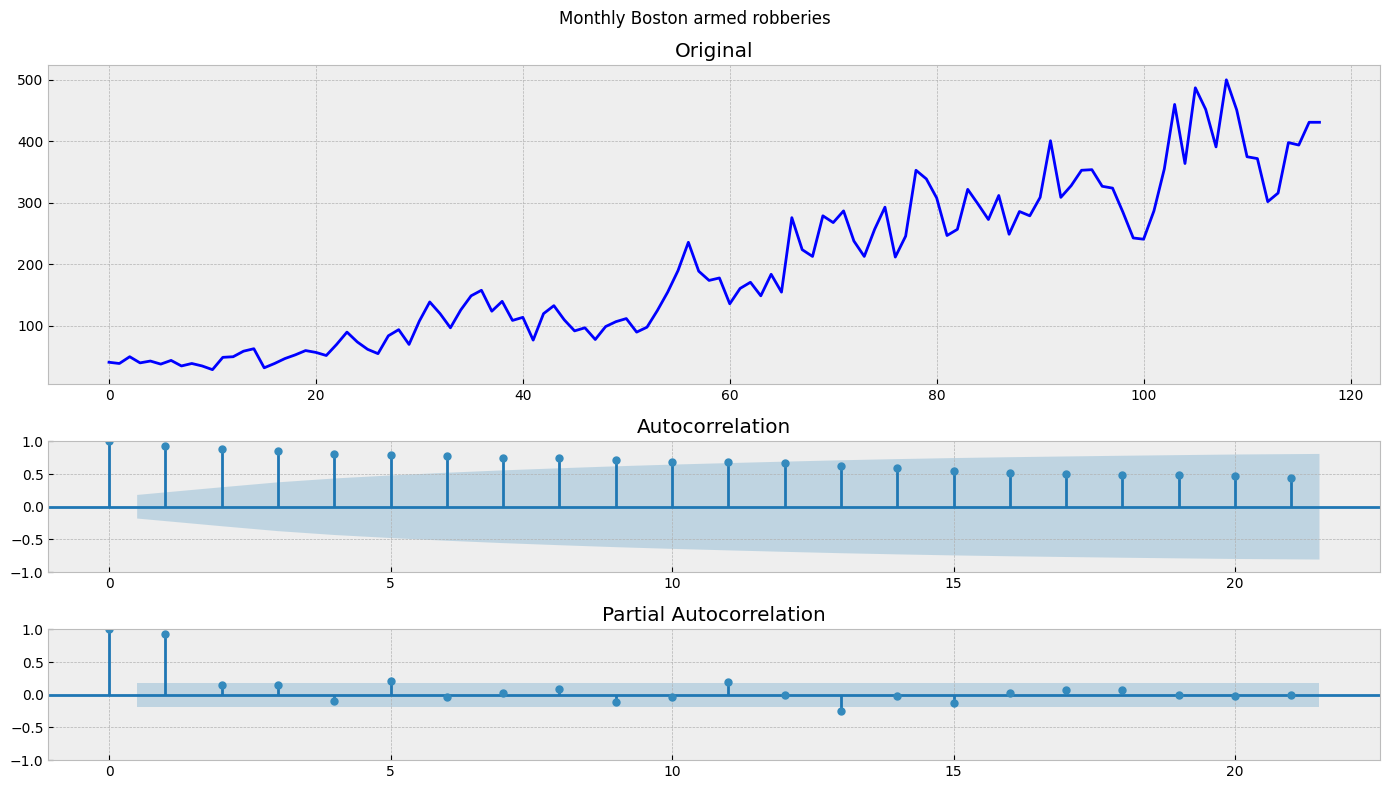

In [ ]:
sname2 = 'Monthly Boston armed robberies'
tsplot(all_series[sname2], sname2);
test_stationarity(all_series[sname2])

По графику видно наличие тренда.
Коррелограмма и тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


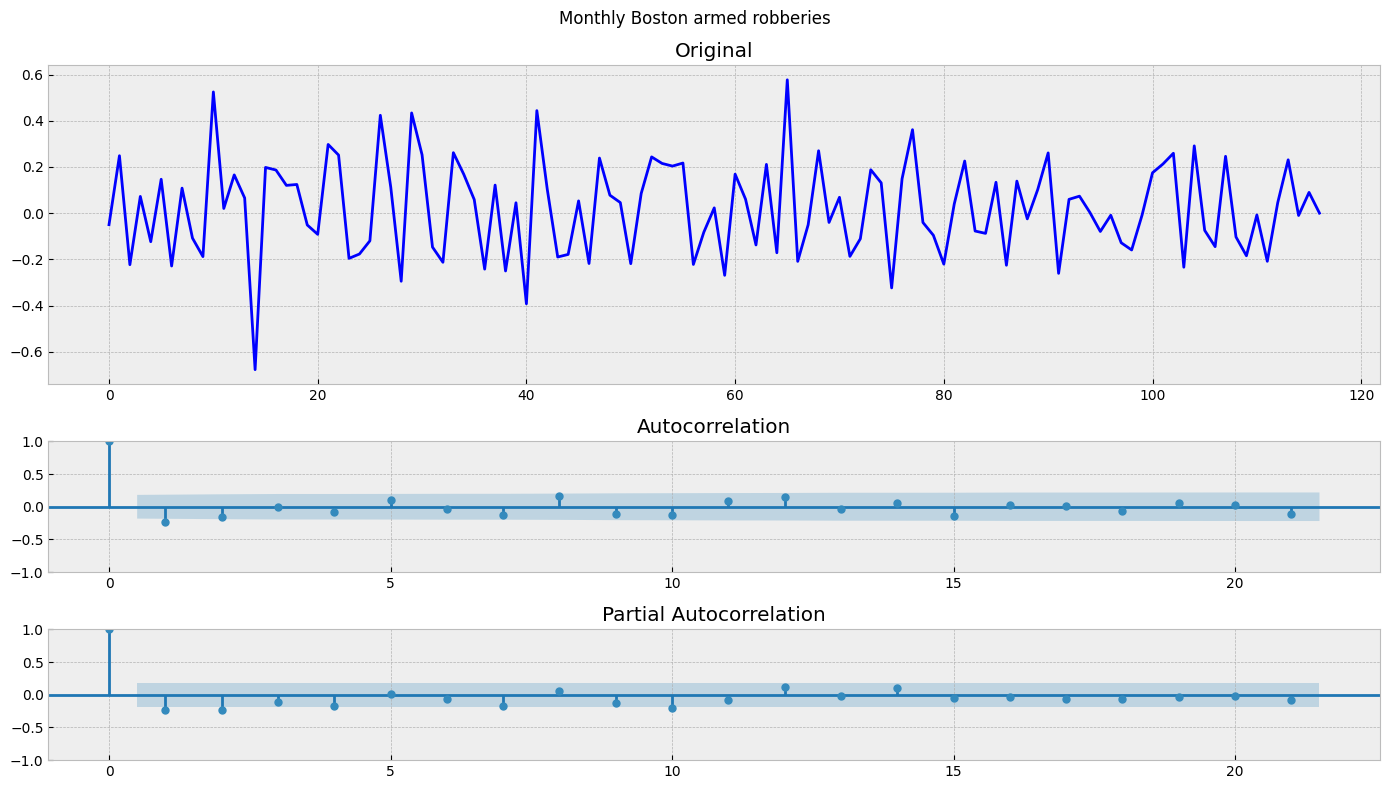

In [ ]:
#Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(all_series[sname2], 0)

#Уберем тренд дифференцированием
series = series[1:] - series[:-1]

#Коррелограмма
tsplot(series, sname2);

#Тест Дики-Фуллера
test_stationarity(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

# 3. International airline passengers: monthly totals in thousands

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


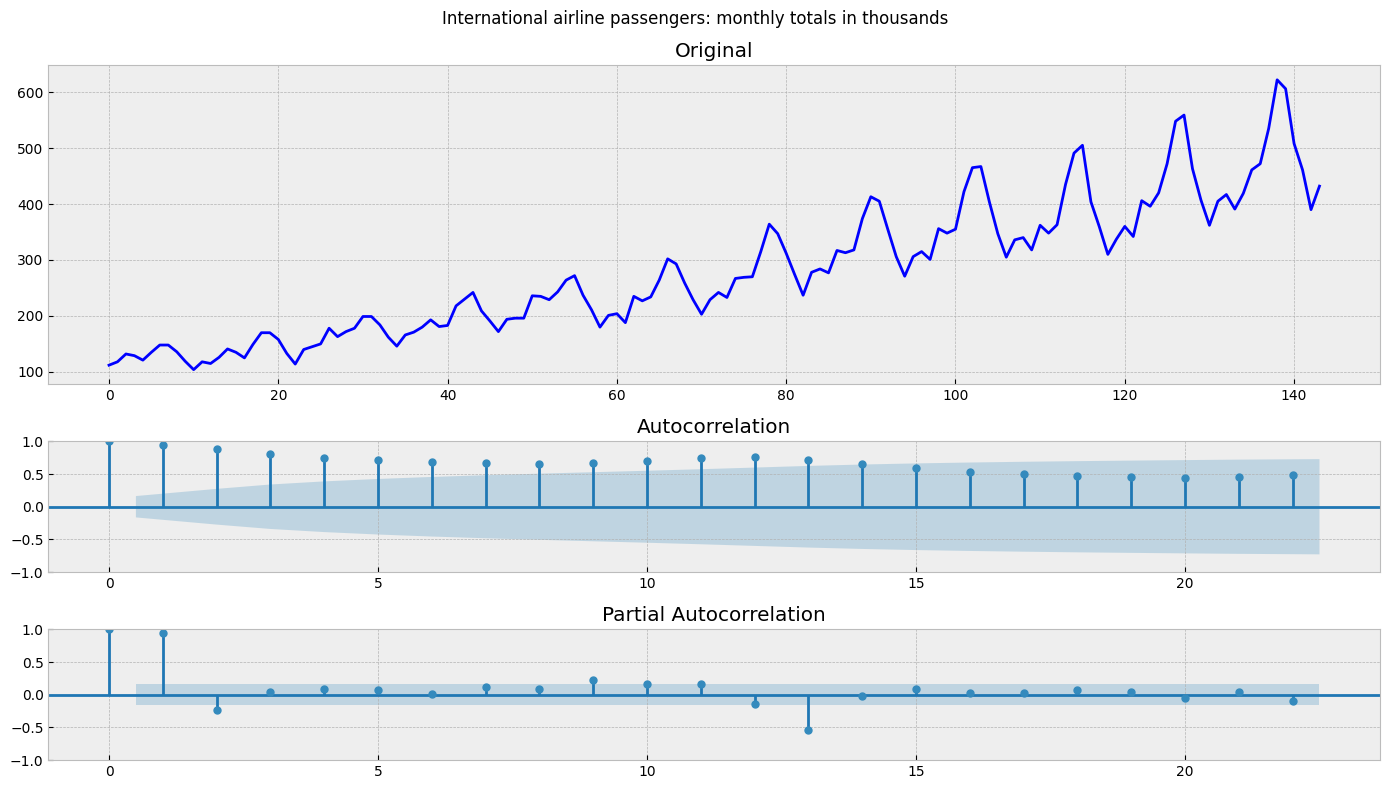

In [ ]:
sname3 = 'International airline passengers: monthly totals in thousands'
tsplot(all_series[sname3], sname3);
test_stationarity(all_series[sname3])

По графику видно наличие тренда и сезонности.
Коррелограмма и тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -4.196988
p-value                          0.000667
#Lags Used                      12.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


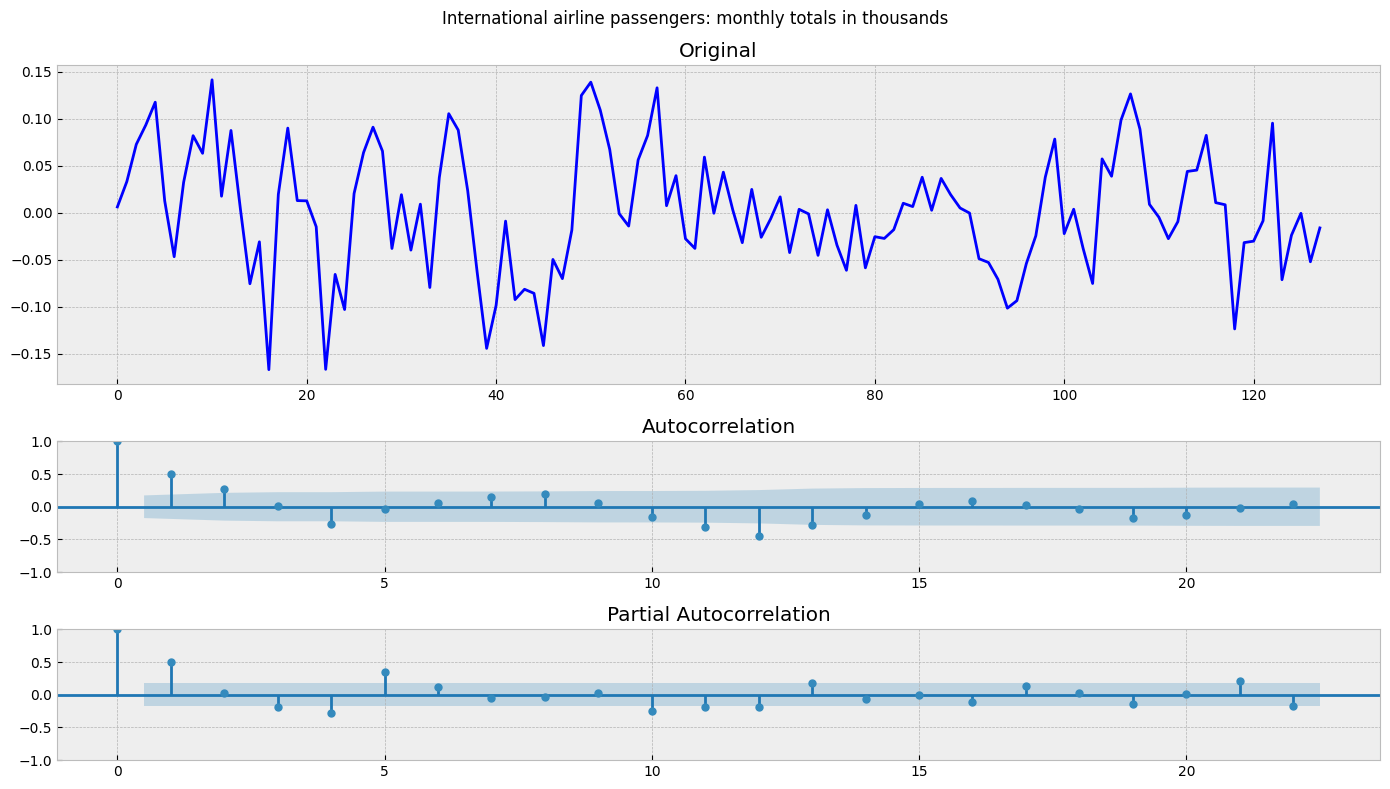

In [ ]:
#Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(all_series[sname3], 0)

#Уберем тренд дифференцированием
series = series[4:] - series[:-4]

#Уберем сезонность -
series = series[12:] - series[:-12]

#Коррелограмма
tsplot(series, sname3);

#Тест Дики-Фуллера
test_stationarity(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

# 4. Mean monthly air temperature (Deg. F) Nottingham Castle

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


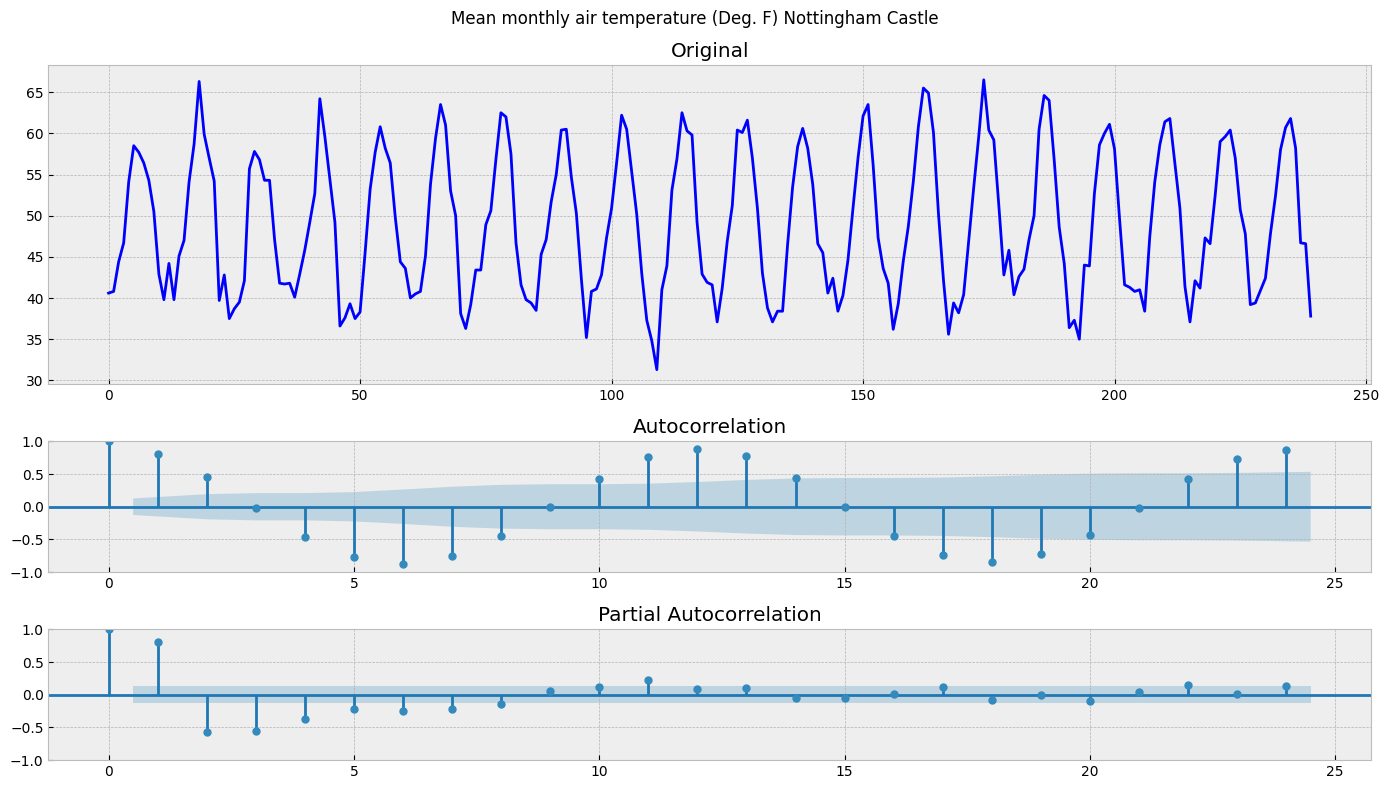

In [ ]:
sname4 = 'Mean monthly air temperature (Deg. F) Nottingham Castle'
tsplot(all_series[sname4], sname4);
test_stationarity(all_series[sname4])

По графику видно наличие сезонности.
Тест Дики-Фуллера говорит о том, что ряд стационарен, но коррелограмма показывает наличие сезонности от которой надо избавиться.

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


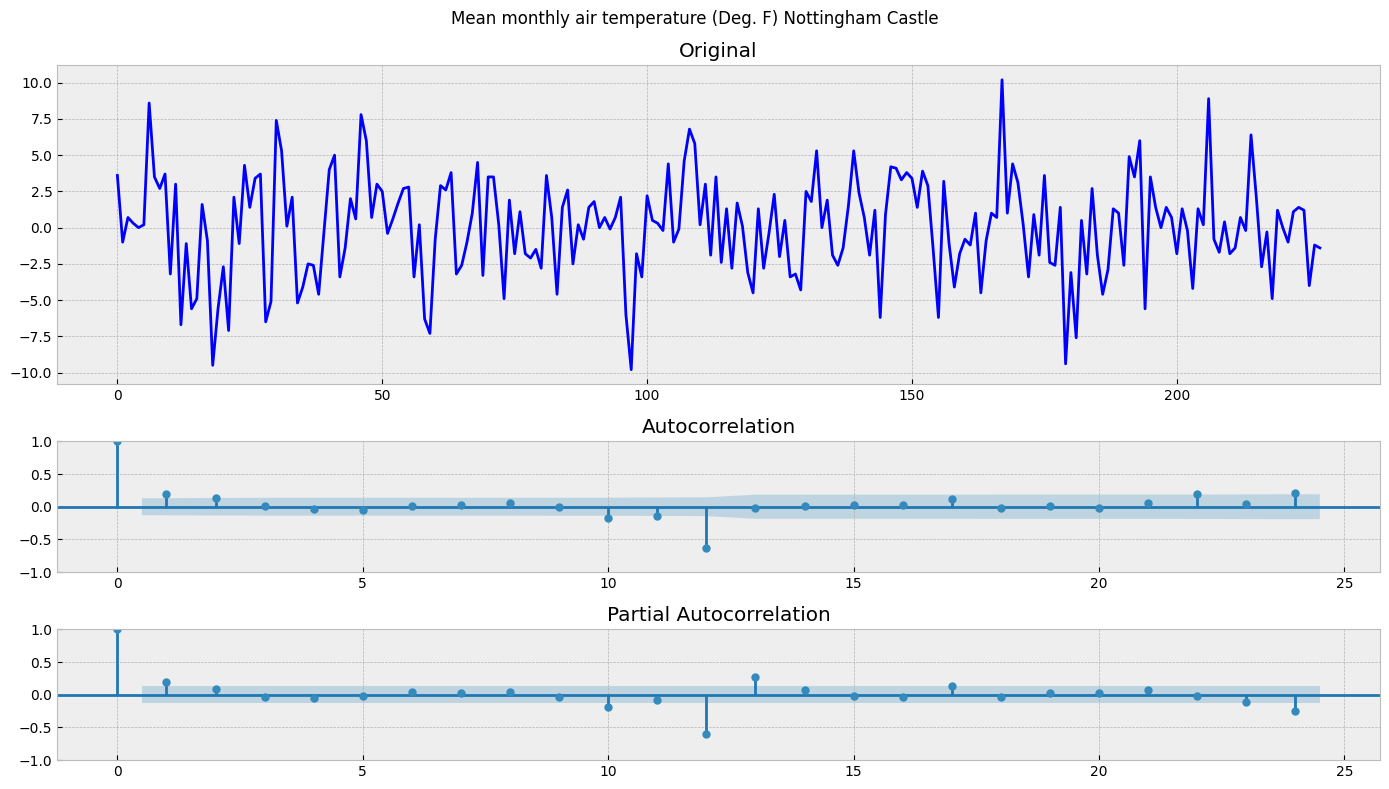

In [ ]:
#series = boxcox(all_series[sname4], 0)
series = all_series[sname4].to_numpy()

#Уберем сезонность -
series = series[12:] - series[:-12]

#Коррелограмма
tsplot(series, sname4);

#Тест Дики-Фуллера
test_stationarity(series)

# 5. Weekly closings of the Dow-Jones industrial average

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


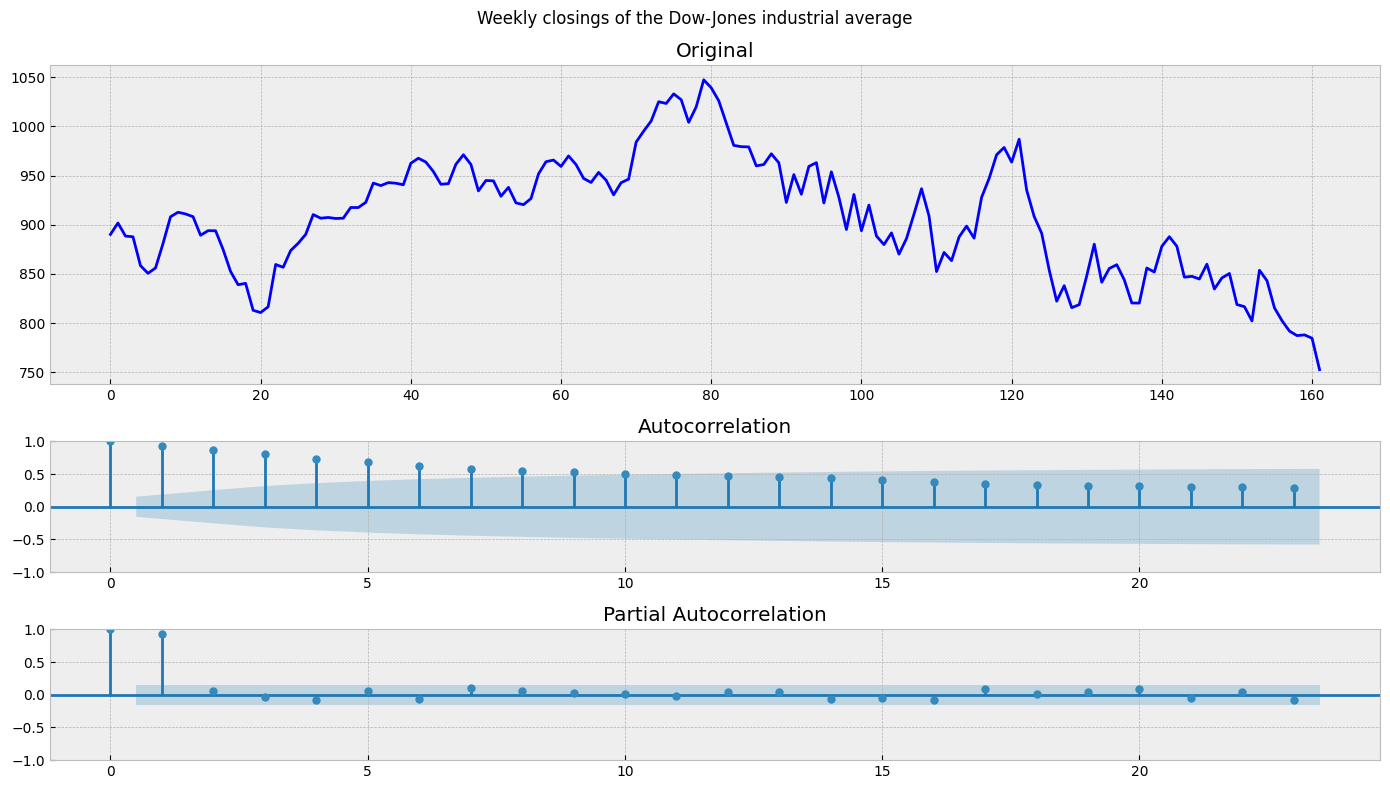

In [ ]:
sname5 = 'Weekly closings of the Dow-Jones industrial average'
tsplot(all_series[sname5], sname5);
test_stationarity(all_series[sname5])

По графику видно наличие тренда.
Коррелограмма и тест Дики-Фуллера не отвергает гипотезу о нестационарности ряда.

Results of Dickey-Fuller Test:
Test Statistic                  -4.744829
p-value                          0.000069
#Lags Used                       9.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


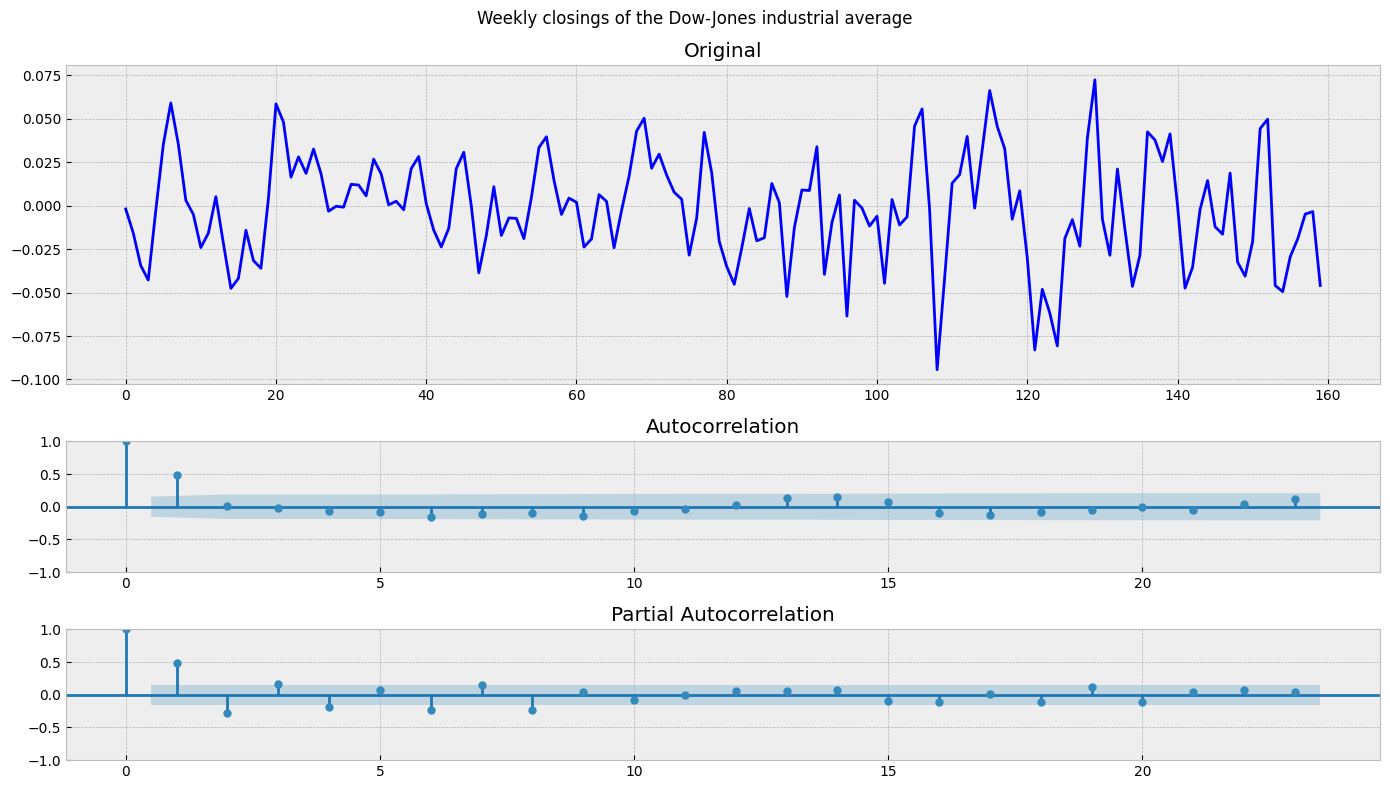

In [ ]:
#Уберем изменение дисперсии при помощи преобразования Бокса-Кокса
series = boxcox(all_series[sname5], 0)

#Уберем тренд дифференцированием
series = series[2:] - series[:-2]

#Коррелограмма
tsplot(series, sname5);

#Тест Дики-Фуллера
test_stationarity(series)

# Daily total female births in California

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


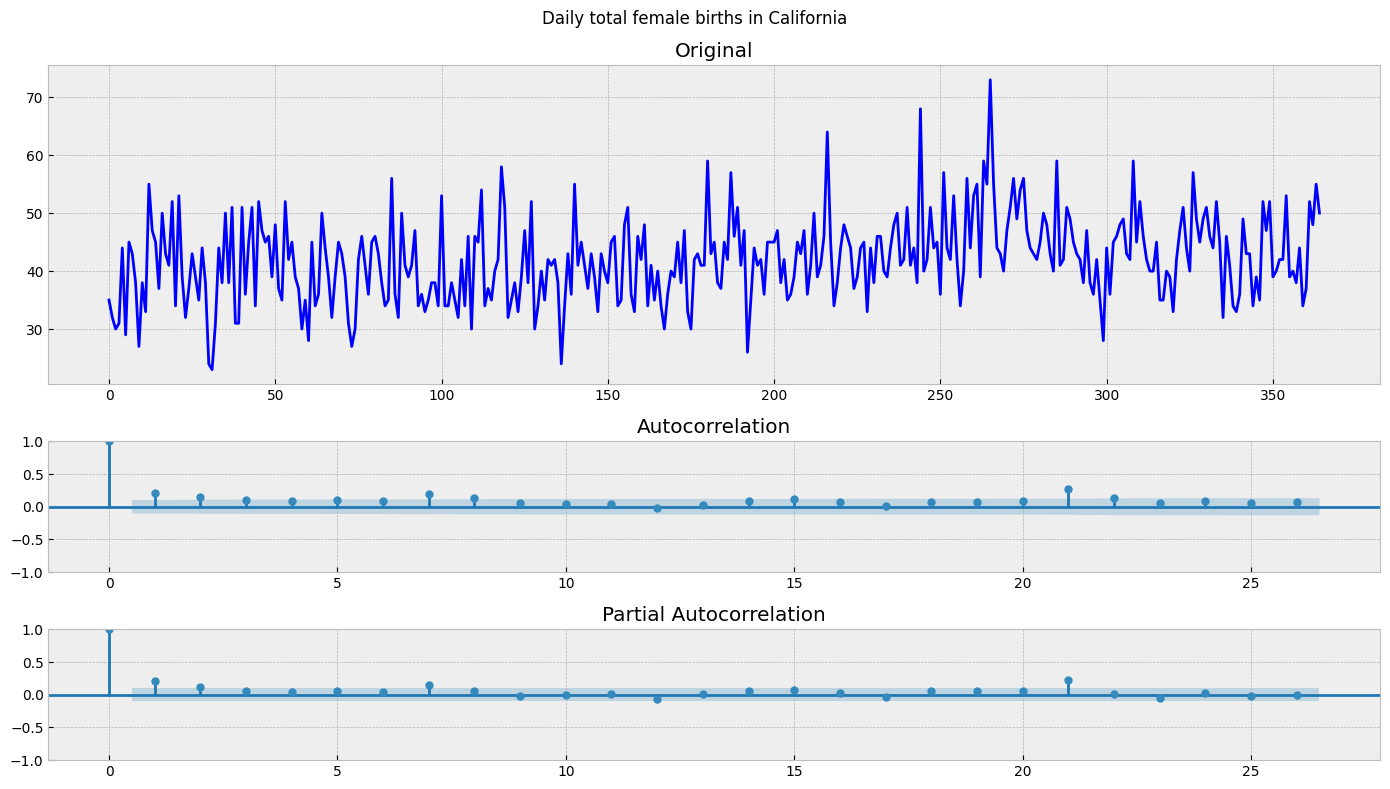

In [ ]:
sname6 = 'Daily total female births in California'
tsplot(all_series[sname6], sname6);
test_stationarity(all_series[sname6])

Коррелограмма и тест Дики-Фуллера подтверждают, что ряд стационарный. Преобразования не требуются